In [1]:
# Import libraries
import pandas as pd
import numpy as np
import nltk

# Import data

In [2]:
# Import txt as dataframe

In [3]:
text_df = pd.read_csv('TRAINING_DATA.txt', sep='\t', header=None, names=['label', 'text'])

# Data Analysis

In [4]:
# Inspect head

In [5]:
text_df.head()

,label,text
0,1,"Cuando conocí a Janice en 2013 , una familia n..."
1,0,Hwang habló en Sur de este año por Southwest M...
2,1,Usted podría pensar Katy Perry y Robert Pattin...
3,1,Cualquiera que haya volado los cielos del crea...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p..."


In [6]:
# Inspect df dtypes

In [7]:
text_df.dtypes

,0
label,int64
text,object


In [8]:
# Inspect if there are NULL values

In [9]:
text_df.isnull().sum()

,0
label,0
text,0


In [10]:
# Check shape of df
rows = text_df.shape[0]
columns = text_df.shape[1]
print(f'The dataframe has {rows} rows and {columns} columns')

The dataframe has 14924 rows and 2 columns


In [11]:
# Inspect word length for each transaltion

In [12]:
translation_word_length = text_df['text'].apply(lambda x: len(x.split()))
translation_word_length

,text
0,27
1,24
2,26
3,33
4,18
...,...
14919,57
14920,42
14921,17
14922,9


In [13]:
# Attach word count to df for better visualization
text_df['word_length'] = translation_word_length

In [14]:
text_df.head()

,label,text,word_length
0,1,"Cuando conocí a Janice en 2013 , una familia n...",27
1,0,Hwang habló en Sur de este año por Southwest M...,24
2,1,Usted podría pensar Katy Perry y Robert Pattin...,26
3,1,Cualquiera que haya volado los cielos del crea...,33
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...",18


# Data Cleaning and Preprocessing

In [15]:
# Lower case words

In [16]:
lowercase_text = text_df['text'].apply(lambda x: x.lower())

In [17]:
text_df['lowercase text'] = lowercase_text

In [18]:
text_df.head()

,label,text,word_length,lowercase text
0,1,"Cuando conocí a Janice en 2013 , una familia n...",27,"cuando conocí a janice en 2013 , una familia n..."
1,0,Hwang habló en Sur de este año por Southwest M...,24,hwang habló en sur de este año por southwest m...
2,1,Usted podría pensar Katy Perry y Robert Pattin...,26,usted podría pensar katy perry y robert pattin...
3,1,Cualquiera que haya volado los cielos del crea...,33,cualquiera que haya volado los cielos del crea...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...",18,"bueno , este cantante tendrá un largo tiempo p..."


In [19]:
# Remove punctuation

In [20]:
import re
import string

In [21]:
pattern = f"[{re.escape(string.punctuation)}]"

In [22]:
no_punkts = lowercase_text.apply(lambda x: re.sub(pattern, '', x))

In [23]:
text_df['no punctuation'] = no_punkts

In [24]:
text_df.head()

,label,text,word_length,lowercase text,no punctuation
0,1,"Cuando conocí a Janice en 2013 , una familia n...",27,"cuando conocí a janice en 2013 , una familia n...",cuando conocí a janice en 2013 una familia ne...
1,0,Hwang habló en Sur de este año por Southwest M...,24,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...
2,1,Usted podría pensar Katy Perry y Robert Pattin...,26,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...
3,1,Cualquiera que haya volado los cielos del crea...,33,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...",18,"bueno , este cantante tendrá un largo tiempo p...",bueno este cantante tendrá un largo tiempo pa...


In [25]:
# Replace nums in the text with <NUM> token
no_nums = lowercase_text.apply(lambda x: re.sub(r'\d+', '<NUM>', x))

In [26]:
text_df['no nums'] = no_nums

In [27]:
text_df.head()

,label,text,word_length,lowercase text,no punctuation,no nums
0,1,"Cuando conocí a Janice en 2013 , una familia n...",27,"cuando conocí a janice en 2013 , una familia n...",cuando conocí a janice en 2013 una familia ne...,"cuando conocí a janice en <NUM> , una familia ..."
1,0,Hwang habló en Sur de este año por Southwest M...,24,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...
2,1,Usted podría pensar Katy Perry y Robert Pattin...,26,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...
3,1,Cualquiera que haya volado los cielos del crea...,33,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...",18,"bueno , este cantante tendrá un largo tiempo p...",bueno este cantante tendrá un largo tiempo pa...,"bueno , este cantante tendrá un largo tiempo p..."


In [28]:
# Tokenize words

In [29]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
tokenized_text = no_nums.apply(lambda x: word_tokenize(x))

In [31]:
text_df['tokenized text'] = tokenized_text

In [32]:
text_df.head()

,label,text,word_length,lowercase text,no punctuation,no nums,tokenized text
0,1,"Cuando conocí a Janice en 2013 , una familia n...",27,"cuando conocí a janice en 2013 , una familia n...",cuando conocí a janice en 2013 una familia ne...,"cuando conocí a janice en <NUM> , una familia ...","[cuando, conocí, a, janice, en, <, NUM, >, ,, ..."
1,0,Hwang habló en Sur de este año por Southwest M...,24,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,"[hwang, habló, en, sur, de, este, año, por, so..."
2,1,Usted podría pensar Katy Perry y Robert Pattin...,26,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,"[usted, podría, pensar, katy, perry, y, robert..."
3,1,Cualquiera que haya volado los cielos del crea...,33,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,"[cualquiera, que, haya, volado, los, cielos, d..."
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...",18,"bueno , este cantante tendrá un largo tiempo p...",bueno este cantante tendrá un largo tiempo pa...,"bueno , este cantante tendrá un largo tiempo p...","[bueno, ,, este, cantante, tendrá, un, largo, ..."


In [33]:
# Remove stop words

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop_words = set(stopwords.words('spanish'))

In [36]:
# Uncomment to see the stop words for Spanish
#stop_words

In [37]:
no_stopword_text = tokenized_text.apply(lambda x:" ".join([word for word in x if word not in stop_words]))

In [38]:
text_df['no stopword text'] = no_stopword_text

In [39]:
text_df.head()

,label,text,word_length,lowercase text,no punctuation,no nums,tokenized text,no stopword text
0,1,"Cuando conocí a Janice en 2013 , una familia n...",27,"cuando conocí a janice en 2013 , una familia n...",cuando conocí a janice en 2013 una familia ne...,"cuando conocí a janice en <NUM> , una familia ...","[cuando, conocí, a, janice, en, <, NUM, >, ,, ...","conocí janice < NUM > , familia necesitaba < N..."
1,0,Hwang habló en Sur de este año por Southwest M...,24,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,"[hwang, habló, en, sur, de, este, año, por, so...",hwang habló sur año southwest music and media ...
2,1,Usted podría pensar Katy Perry y Robert Pattin...,26,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,"[usted, podría, pensar, katy, perry, y, robert...",usted podría pensar katy perry robert pattinso...
3,1,Cualquiera que haya volado los cielos del crea...,33,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,"[cualquiera, que, haya, volado, los, cielos, d...",cualquiera volado cielos creador escuchado act...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...",18,"bueno , este cantante tendrá un largo tiempo p...",bueno este cantante tendrá un largo tiempo pa...,"bueno , este cantante tendrá un largo tiempo p...","[bueno, ,, este, cantante, tendrá, un, largo, ...","bueno , cantante largo tiempo sentir aún remor..."


In [40]:
# Lemmatize words

In [41]:
# Install SpaCy through pip
# Uncomment to install
# ! pip install spacy
#! python -m spacy download es_core_news_sm

In [42]:
# Lemmatize words using SpaCy (for Spanish)
import spacy
spa_lemmatizer = spacy.load('es_core_news_sm')

In [43]:
lemmatized_text = no_stopword_text.apply(lambda x: [token.lemma_ for token in spa_lemmatizer(x)])

In [44]:
text_df['lemmatized text'] = lemmatized_text

In [45]:
text_df.head()

,label,text,word_length,lowercase text,no punctuation,no nums,tokenized text,no stopword text,lemmatized text
0,1,"Cuando conocí a Janice en 2013 , una familia n...",27,"cuando conocí a janice en 2013 , una familia n...",cuando conocí a janice en 2013 una familia ne...,"cuando conocí a janice en <NUM> , una familia ...","[cuando, conocí, a, janice, en, <, NUM, >, ,, ...","conocí janice < NUM > , familia necesitaba < N...","[conocer, janice, <, NUM, >, ,, familia, neces..."
1,0,Hwang habló en Sur de este año por Southwest M...,24,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,"[hwang, habló, en, sur, de, este, año, por, so...",hwang habló sur año southwest music and media ...,"[hwang, hablar, sur, año, southwest, music, an..."
2,1,Usted podría pensar Katy Perry y Robert Pattin...,26,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,"[usted, podría, pensar, katy, perry, y, robert...",usted podría pensar katy perry robert pattinso...,"[usted, poder, pensar, katy, perry, robert, pa..."
3,1,Cualquiera que haya volado los cielos del crea...,33,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,"[cualquiera, que, haya, volado, los, cielos, d...",cualquiera volado cielos creador escuchado act...,"[cualquiera, volado, cielo, creador, escuchado..."
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...",18,"bueno , este cantante tendrá un largo tiempo p...",bueno este cantante tendrá un largo tiempo pa...,"bueno , este cantante tendrá un largo tiempo p...","[bueno, ,, este, cantante, tendrá, un, largo, ...","bueno , cantante largo tiempo sentir aún remor...","[bueno, ,, cantante, largo, tiempo, sentir, aú..."


In [46]:
# Join final text to be used for vectorization
final_text = lemmatized_text.apply(lambda x: " ".join(x))

In [47]:
text_df['final text'] = final_text

In [48]:
text_df.head()

,label,text,word_length,lowercase text,no punctuation,no nums,tokenized text,no stopword text,lemmatized text,final text
0,1,"Cuando conocí a Janice en 2013 , una familia n...",27,"cuando conocí a janice en 2013 , una familia n...",cuando conocí a janice en 2013 una familia ne...,"cuando conocí a janice en <NUM> , una familia ...","[cuando, conocí, a, janice, en, <, NUM, >, ,, ...","conocí janice < NUM > , familia necesitaba < N...","[conocer, janice, <, NUM, >, ,, familia, neces...","conocer janice < NUM > , familia necesitar < N..."
1,0,Hwang habló en Sur de este año por Southwest M...,24,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,hwang habló en sur de este año por southwest m...,"[hwang, habló, en, sur, de, este, año, por, so...",hwang habló sur año southwest music and media ...,"[hwang, hablar, sur, año, southwest, music, an...",hwang hablar sur año southwest music and medio...
2,1,Usted podría pensar Katy Perry y Robert Pattin...,26,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,usted podría pensar katy perry y robert pattin...,"[usted, podría, pensar, katy, perry, y, robert...",usted podría pensar katy perry robert pattinso...,"[usted, poder, pensar, katy, perry, robert, pa...",usted poder pensar katy perry robert pattinson...
3,1,Cualquiera que haya volado los cielos del crea...,33,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,cualquiera que haya volado los cielos del crea...,"[cualquiera, que, haya, volado, los, cielos, d...",cualquiera volado cielos creador escuchado act...,"[cualquiera, volado, cielo, creador, escuchado...",cualquiera volado cielo creador escuchado acto...
4,1,"Bueno , este cantante tendrá un LARGO tiempo p...",18,"bueno , este cantante tendrá un largo tiempo p...",bueno este cantante tendrá un largo tiempo pa...,"bueno , este cantante tendrá un largo tiempo p...","[bueno, ,, este, cantante, tendrá, un, largo, ...","bueno , cantante largo tiempo sentir aún remor...","[bueno, ,, cantante, largo, tiempo, sentir, aú...","bueno , cantante largo tiempo sentir aún remor..."


In [49]:
# Vectorize data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=50000)

tf_idf_matrix = vectorizer.fit_transform(final_text)

vocab = vectorizer.get_feature_names_out()

document_term_matrix = pd.DataFrame.sparse.from_spmatrix(tf_idf_matrix, columns=vocab)

In [50]:
# See vocab size
vocab_size = len(vocab)
print(vocab_size)

50000


In [51]:
document_term_matrix.head()

,aar,aar levie,aar paul,abajo,abajo num,abajo ver,abandonado,abandonar,abastecimiento,abbey,...,ús,útil,útil aquel,útil categorizar,útil cepillar,útil colección,útil instruir,útil num,útil saber,útil viajero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Inspect final data processed

In [53]:
final_df = pd.concat([text_df['label'], document_term_matrix], axis=1)

In [54]:
final_df.head()

,label,aar,aar levie,aar paul,abajo,abajo num,abajo ver,abandonado,abandonar,abastecimiento,...,ús,útil,útil aquel,útil categorizar,útil cepillar,útil colección,útil instruir,útil num,útil saber,útil viajero
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Initialize Model

In [64]:
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Pipeline Setup
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Train, test, split
from sklearn.model_selection import train_test_split

In [65]:
X = final_df.drop('label', axis=1)
y = final_df['label']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Intialize Pipeline to test both models

In [77]:
models = {
    'logistic_regression': LogisticRegression(max_iter=500, solver='saga'),
    'random_forest': RandomForestClassifier()
}

In [78]:
param_grids = {
    'logistic_regression': {'clf__C': [0.1, 1, 10]},
    'random_forest': {'clf__n_estimators': [50, 100, 200], 'clf__max_depth': [None, 10, 20, 30]}
}

# Model Training

In [79]:
best_models = {}

In [82]:
# Start GridSearch to find the best model
for model_name, model in models.items():
    print(f"Running GridSearch for {model_name}...")
    pipeline = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),
        ('clf', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=param_grids[model_name], cv=5)

    grid_search.fit(X_train, y_train)


      # Best parameters and model
    print(f"Best parameters for {model_name}: ", grid_search.best_params_)
    print(f"Best model for {model_name}: ", grid_search.best_estimator_)


    best_models[model_name] = grid_search.best_estimator_

print("Best Models Found:", best_models)

Running GridSearch for logistic_regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best parameters for logistic_regression:  {'clf__C': 10}
Best model for logistic_regression:  Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('clf', LogisticRegression(C=10, max_iter=500, solver='saga'))])
Running GridSearch for random_forest...
Best parameters for random_forest:  {'clf__max_depth': 10, 'clf__n_estimators': 50}
Best model for random_forest:  Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('clf', RandomForestClassifier(max_depth=10, n_estimators=50))])
Best Models Found: {'logistic_regression': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('clf', LogisticRegression(C=10, max_iter=500, solver='saga'))]), 'random_forest': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('clf', RandomForestClassifier(max_depth=10, n_estimators=50))])}


- Best parameters for logistic_regression:  {'clf__C': 10}
- Best model for logistic_regression:  Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('clf', LogisticRegression(C=10, max_iter=500, solver='saga'))])

- Best parameters for random_forest:  {'clf__max_depth': 10, 'clf__n_estimators': 50}
- Best model for random_forest:  Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('clf', RandomForestClassifier(max_depth=10, n_estimators=50))])
- Best Models Found: {'logistic_regression': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('clf', LogisticRegression(C=10, max_iter=500, solver='saga'))]), 'random_forest': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('clf', RandomForestClassifier(max_depth=10, n_estimators=50))])}

# Model Evaluation

In [83]:
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
# Predictions on best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [85]:
# Make classfication report
report = classification_report(y_pred, y_test)

In [86]:
print(report)

              precision    recall  f1-score   support

           0       0.30      0.48      0.37       956
           1       0.66      0.48      0.56      2029

    accuracy                           0.48      2985
   macro avg       0.48      0.48      0.46      2985
weighted avg       0.55      0.48      0.50      2985



In [87]:
# Print accuracy score
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.4814070351758794


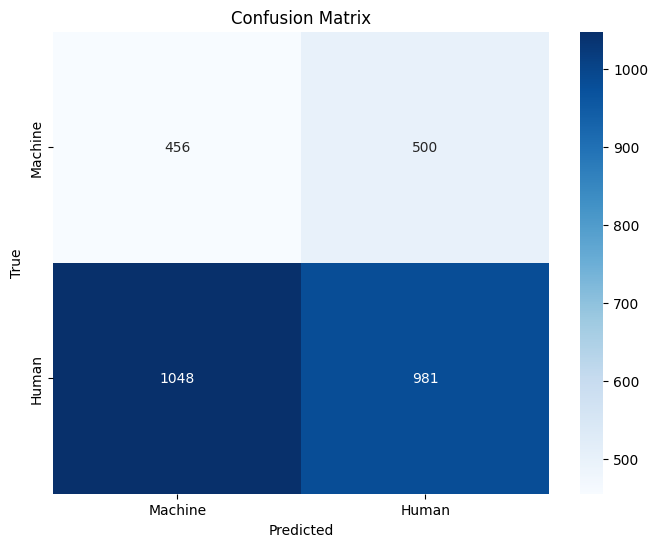

In [90]:
# Print confusion matrix
cm = confusion_matrix(y_pred, y_test)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Machine', 'Human'], yticklabels=['Machine', 'Human'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Test Model on real data

In [91]:
# Save model with joblib
from joblib import dump, load

dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [97]:
# Load real data
real_data = pd.read_csv('REAL_DATA.txt', sep='\t', header=None, names=['label', 'text'], quoting=3)

In [ ]:
# Preprocess data

In [ ]:
# Load saved model
loaded_model = load('best_model.joblib')

In [ ]:
# Make predictions and probabilities